In [1]:
import matplotlib.image as mpimg
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
import math
import cv2
import pandas as pd

In [2]:
from keras.preprocessing.image import ImageDataGenerator 


Using TensorFlow backend.


# Changing Directory to dataset

In [3]:
cd /

C:\


In [4]:
cd Penn State\Projects\Lane Detection\Dataset

C:\Penn State\Projects\Lane Detection\Dataset


In [5]:
os.getcwd()

'C:\\Penn State\\Projects\\Lane Detection\\Dataset'

# Creating Pandas Dataframe for dataset

In [6]:
train = []

for file in os.listdir(os.path.join(os.getcwd(), 'RGB_data')):
    train.append([os.path.join(os.getcwd(), 'RGB_data', file),
                     os.path.join(os.getcwd(), 'Segmented_data', file)])
 

In [7]:
train = pd.DataFrame(train, columns=['Camera_Image', 'Segmented_Images'])
print(train.head())

                                        Camera_Image  \
0  C:\Penn State\Projects\Lane Detection\Dataset\...   
1  C:\Penn State\Projects\Lane Detection\Dataset\...   
2  C:\Penn State\Projects\Lane Detection\Dataset\...   
3  C:\Penn State\Projects\Lane Detection\Dataset\...   
4  C:\Penn State\Projects\Lane Detection\Dataset\...   

                                    Segmented_Images  
0  C:\Penn State\Projects\Lane Detection\Dataset\...  
1  C:\Penn State\Projects\Lane Detection\Dataset\...  
2  C:\Penn State\Projects\Lane Detection\Dataset\...  
3  C:\Penn State\Projects\Lane Detection\Dataset\...  
4  C:\Penn State\Projects\Lane Detection\Dataset\...  


Check for RGB data and corresponding Segmented label in dataframe train

In [8]:
print(train.iloc[200][0])

C:\Penn State\Projects\Lane Detection\Dataset\RGB_data\279.png


In [9]:
print(train.iloc[200][1])

C:\Penn State\Projects\Lane Detection\Dataset\Segmented_data\279.png


In [31]:
def encoded_to_colored(image):
    x_visual= np.zeros((320, 800, 3), dtype = float)
    #image = skyHoodRemove(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if math.floor(max(image[i][j] )) == 1:
                x_visual[i][j] = [0.,0.,0.]
            else :
                x_visual[i][j] = [0., 255., 0.]
                
    
    return x_visual

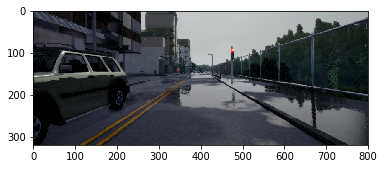

In [22]:
img1 = cv2.imread(train.iloc[0][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


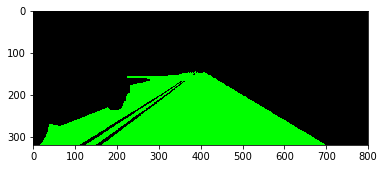

In [32]:
img2 = cv2.imread(train.iloc[0][1])
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = encoded_to_colored(img2)
plt.imshow(img2)

In [33]:
os.getcwd()

'C:\\Penn State\\Projects\\Lane Detection\\Dataset'

# Make Directory for Augmented Data

In [34]:
mkdir Augmented_RGB

In [35]:
mkdir Augmented_Seg

# Data Augmentation with Keras Pre-processing
You can do this before model training. 

In [36]:
data_gen_args = dict(
                         rotation_range=30,
                         width_shift_range=0.2,
                         height_shift_range=0.1,
                         zoom_range=0.0)
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

In [37]:
%%time
for j in range(len(train)):
    
    img1 = cv2.imread(train.iloc[j][0])
#img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

    img2 = cv2.imread(train.iloc[j][1])
    #img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

    img1_x = np.expand_dims(img1,0)
    img2_x = np.expand_dims(img2,0)
#plt.imshow(img4)

   
    seed = 125

    image_generator = image_datagen.flow(img1_x,seed=seed)

    mask_generator = mask_datagen.flow(img2_x,seed=seed)

    image_aug = [next(image_generator)[0] for i in range(3)]
    mask_aug = [next(mask_generator)[0].astype(np.uint8) for i in range(3)]
    
    cv2.imwrite(os.path.join(os.getcwd(), "Augmented_RGB", str(j)+"_"+str(1) + ".png"), image_aug[1])
    cv2.imwrite(os.path.join(os.getcwd(), "Augmented_RGB", str(j)+"_"+str(2) + ".png"), image_aug[2])
    
    cv2.imwrite(os.path.join(os.getcwd(), "Augmented_Seg", str(j)+"_"+str(1) + ".png"), mask_aug[1])
    cv2.imwrite(os.path.join(os.getcwd(), "Augmented_Seg", str(j)+"_"+str(2) + ".png"), mask_aug[2])

Wall time: 5min 14s


# Creating dataframe for Augmented data

In [38]:
Augmented_data = []

for file in os.listdir(os.path.join(os.getcwd(), 'Augmented_RGB')):
    Augmented_data.append([os.path.join(os.getcwd(), 'Augmented_RGB', file),
                     os.path.join(os.getcwd(), 'Augmented_Seg', file)])
    
Augmented_data = pd.DataFrame(Augmented_data, columns=['Camera_Image', 'Segmented_Images'])
print(Augmented_data.head())

                                        Camera_Image  \
0  C:\Penn State\Projects\Lane Detection\Dataset\...   
1  C:\Penn State\Projects\Lane Detection\Dataset\...   
2  C:\Penn State\Projects\Lane Detection\Dataset\...   
3  C:\Penn State\Projects\Lane Detection\Dataset\...   
4  C:\Penn State\Projects\Lane Detection\Dataset\...   

                                    Segmented_Images  
0  C:\Penn State\Projects\Lane Detection\Dataset\...  
1  C:\Penn State\Projects\Lane Detection\Dataset\...  
2  C:\Penn State\Projects\Lane Detection\Dataset\...  
3  C:\Penn State\Projects\Lane Detection\Dataset\...  
4  C:\Penn State\Projects\Lane Detection\Dataset\...  


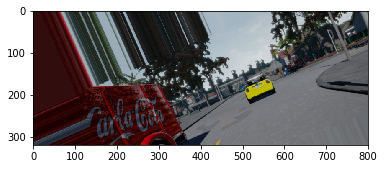

In [39]:
img1 = cv2.imread(Augmented_data.iloc[998][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


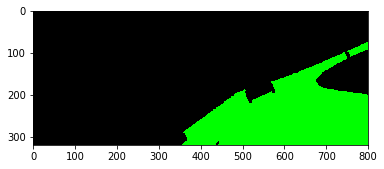

In [40]:
img1 = cv2.imread(Augmented_data.iloc[998][1])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = encoded_to_colored(img1)
plt.imshow(img1)

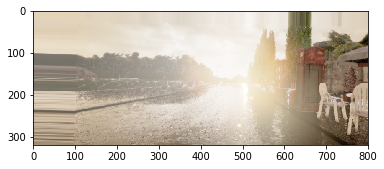

In [41]:
img1 = cv2.imread(Augmented_data.iloc[1835][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


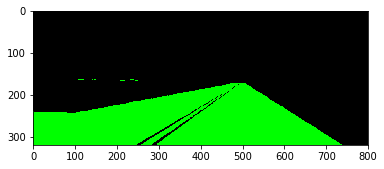

In [42]:
img1 = cv2.imread(Augmented_data.iloc[1835][1])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = encoded_to_colored(img1)
plt.imshow(img1)

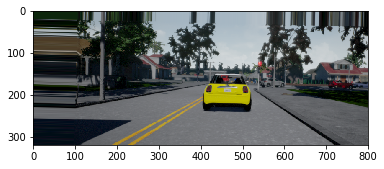

In [43]:
img1 = cv2.imread(Augmented_data.iloc[621][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


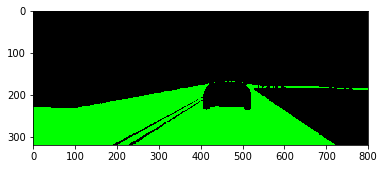

In [44]:
img1 = cv2.imread(Augmented_data.iloc[621][1])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = encoded_to_colored(img1)
plt.imshow(img1)

# Merge Original data and Augmented data to final training data

In [45]:
Train_data = [train, Augmented_data]
Train_data = pd.concat(Train_data)

In [46]:
len(Train_data)

3000

In [47]:
Train_data.head()

,Camera_Image,Segmented_Images
0,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...
1,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...
2,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...
3,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...
4,C:\Penn State\Projects\Lane Detection\Dataset\...,C:\Penn State\Projects\Lane Detection\Dataset\...


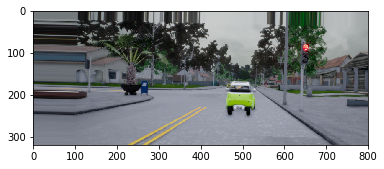

In [48]:
img1 = cv2.imread(Train_data.iloc[2455][0])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

plt.imshow(img1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


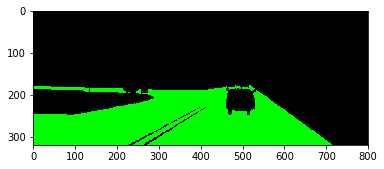

In [49]:
img1 = cv2.imread(Train_data.iloc[2455][1])
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = encoded_to_colored(img1)
plt.imshow(img1)

# Visualising Dataset

C:\Users\tgmte\Anaconda3\envs\dlwin36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


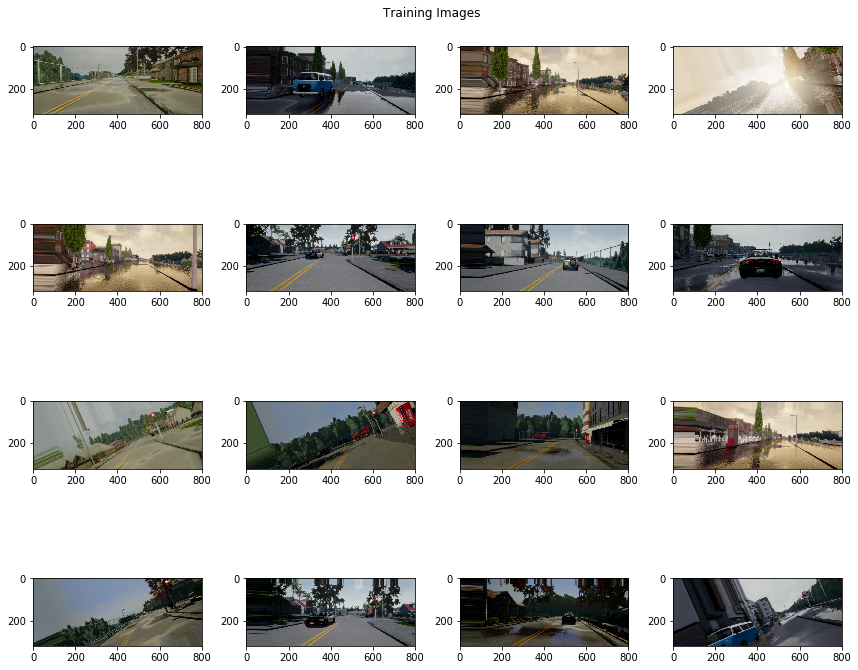

In [50]:
from random import randint

x = [randint(0, len(Train_data)) for p in range(16)]
f, axs = plt.subplots(4,4, figsize=(12,10))
f.tight_layout()
f.suptitle('Training Images')
for i, ax in enumerate(axs.ravel()):
    ax.grid('off')
    ax.imshow(mpimg.imread(Train_data.iloc[x[i]][0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

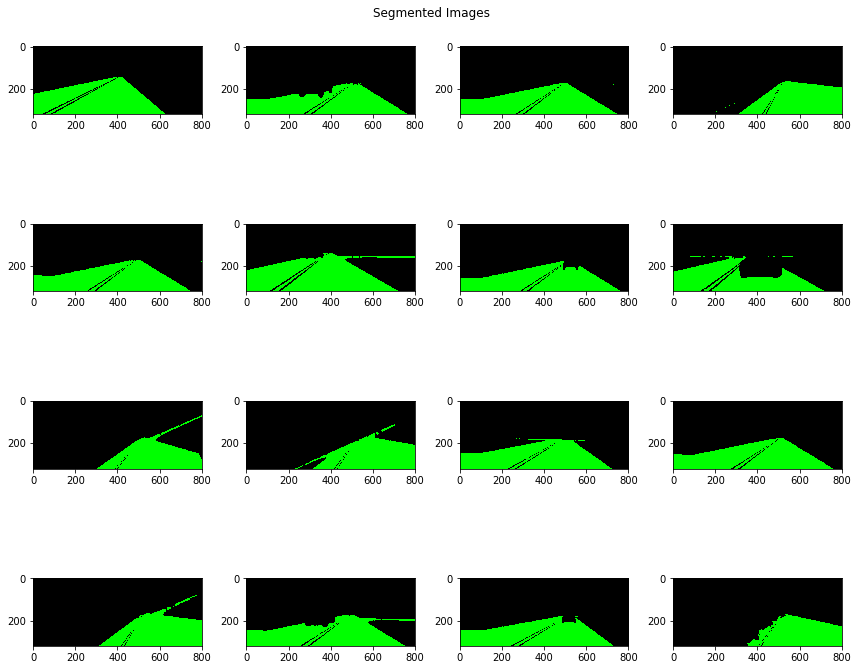

In [52]:
f, axs = plt.subplots(4,4, figsize=(12,10))
f.tight_layout()
f.suptitle('Segmented Images')
for i, ax in enumerate(axs.ravel()):
    ax.grid('off')
    img1 = cv2.imread(Train_data.iloc[x[i]][1])
    img1 = encoded_to_colored(img1)
    ax.imshow(img1)